In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [5]:
## EXPERIMENTAL LLM MATRICES
models = ['llama', 'mistral', 'qwen']
matrices_llm = {}
        
for model in models:
    matrix1 = np.loadtxt(f"data/{model}10rep_final1.txt")
    matrix2 = np.loadtxt(f"data/{model}10rep_final2.txt")
    matrix = (matrix1 + matrix2)/2
    key = f"{model}_final"
    matrices_llm[key] = matrix
  
extractions = {'simple', 'extract', 'multi'}
for model in models:
    for extract in extractions:
        key = f"{model}_{extract}"
        matrices_llm[key] =  np.loadtxt(f"data/{model}_{extract}.txt")


In [9]:
## THEORETICAL AND HUMAN MATRICES
comparison = ['human', 'nash']
matrices_theoretical = {}
for element in comparison:
    matrices_theoretical[element] = np.loadtxt(f"data/matrix_{element}")

In [ ]:
pearson_llama = {}
for element in comparison:
    pearson_llama[element] = np.corrcoef(matrices_llm['llama_final'].ravel(), matrices_theoretical[element].ravel())[0, 1]

print(pearson_llama)

plt.bar(pearson_llama.keys(), pearson_llama.values(), color = colors)
plt.ylabel('Pearson Correlation Coefficient (r)')
plt.xlabel('Matrix compared')
plt.savefig('pearsonllama.jpg')
plt.show()


for element in comparison:
    diff_llama[element] = np.mean((matrices_llm['mistral_final'] - matrices_theoretical[element])**2)
print(diff_llama)

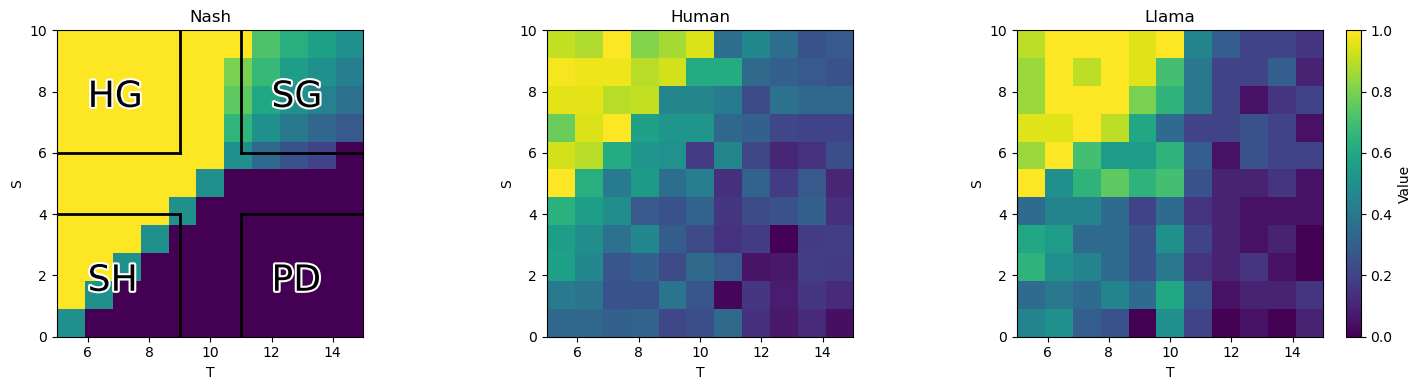

In [13]:
import matplotlib.patheffects as pe
fig, axes = plt.subplots(1, 3, figsize=(15, 4))  # 1 fila, 3 columnes

im0 = axes[0].imshow(matrices_theoretical['nash'], 
                     extent=[5, 15, 0, 10], 
                     aspect='equal', 
                     vmin=0, vmax=1)   # així tens escala fixa i opaca
axes[0].set_xlabel("T")
axes[0].set_ylabel("S")
axes[0].set_title("Nash")

# línies de separació (més gruixudes perquè no es perdin)
axes[0].plot([5,9],[6,6], color='black', linewidth=2)
axes[0].plot([9,9],[10,6], color='black', linewidth=2)

axes[0].plot([11,11],[10,6], color='black', linewidth=2)
axes[0].plot([11,15],[6,6], color='black', linewidth=2)

axes[0].plot([5,9],[4,4], color='black', linewidth=2)
axes[0].plot([9,9],[0,4], color='black', linewidth=2)

axes[0].plot([11,15],[4,4], color='black', linewidth=2)
axes[0].plot([11,11],[0,4], color='black', linewidth=2)

# textos amb contorn blanc perquè no desapareguin
txt_kw = dict(fontsize=26, color="black", 
              path_effects=[pe.Stroke(linewidth=3, foreground="white"), pe.Normal()])

axes[0].text(6, 7.5, 'HG', **txt_kw)
axes[0].text(12, 7.5, 'SG', **txt_kw)
axes[0].text(6, 1.5, 'SH', **txt_kw)
axes[0].text(12, 1.5, 'PD', **txt_kw)

# Segon plot
im1 = axes[1].imshow(matrices_theoretical['human'], extent=[5, 15, 0, 10], aspect='equal')
axes[1].set_xlabel("T")
axes[1].set_ylabel("S")
axes[1].set_title("Human")

# Tercer plot
im2 = axes[2].imshow(matrices_llm['llama_final'], extent=[5, 15, 0, 10], aspect='equal')
axes[2].set_xlabel("T")
axes[2].set_ylabel("S")
axes[2].set_title("Llama")

fig.colorbar(im2, ax=axes[2], label="Value")

plt.tight_layout()
plt.show()


In [23]:
# Generar les noves matrius saps perquè me'n tocarà ajuntar dos
c1 = np.loadtxt(f'data/cooperation1.txt')
c2 = np.loadtxt(f'data/cooperation2.txt')
s1 = np.loadtxt(f'data/sticking1.txt')
s2 = np.loadtxt(f'data/sticking2.txt')

cooperation = (c1 + c2)/2
sticking = (s1 + s2)/2

<function matplotlib.pyplot.show(close=None, block=None)>

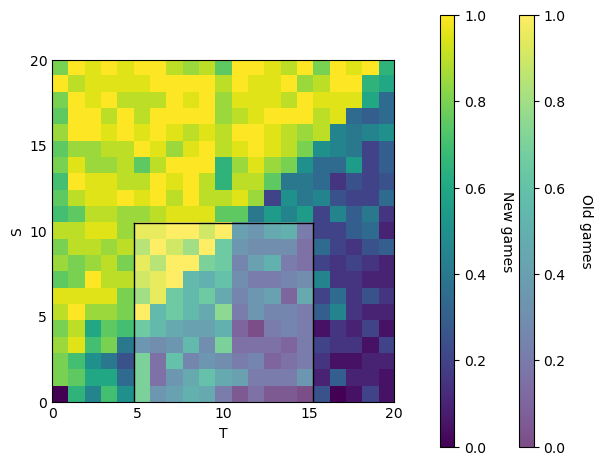

In [67]:
# Matriu de bloquejos
mask = np.zeros_like(cooperation, dtype=bool)
mask[0:21, 0:5] = True   
mask[0:21, 16:21] = True 
mask[0:10, 5:16] = True 

# Convertir la màscara en alpha
alpha = np.ones_like(cooperation, dtype=float)
alpha[mask] = 0.7   # transparència 30% (0 = invisible, 1 = opac)

data_old = np.ma.masked_where(mask, cooperation)  # Non-transparent part
data_new = np.ma.masked_where(~mask, cooperation)  # Transparent part

# Plot the transparent part (background layer)
im1 = plt.imshow(
    data_old,
    extent=[0, 20, 0, 20],
    aspect='equal',
    cmap='viridis',
    alpha=0.7,  
)

# Plot the opaque part (foreground layer)
im2 = plt.imshow(
    data_new,
    extent=[0, 20, 0, 20],
    aspect='equal',
    cmap='viridis',
    alpha=1,  
)

cbar1 = plt.colorbar(im1, pad=0.02, aspect=30)
cbar1.set_label('Old games', rotation=270, labelpad=20)

# Colorbar for opaque part
cbar2 = plt.colorbar(im2, pad=0.1, aspect=30)
cbar2.set_label('New games', rotation=270, labelpad=20)


plt.plot([5*20/21,5*20/21],[0,11*20/21], color='black', linewidth=1)
plt.plot([5*20/21,16*20/21],[11*20/21,11*20/21], color='black', linewidth=1)
plt.plot([16*20/21,16*20/21],[11*20/21,0], color='black', linewidth=1)

plt.xlabel("T")
plt.ylabel("S")

plt.tight_layout()

plt.xticks([0,5,10,15,20])
plt.yticks([0,5,10,15,20])
# Treure les ratlletes, deixar només números
plt.tick_params(axis='x', length=0)
plt.tick_params(axis='y', length=0)
plt.show

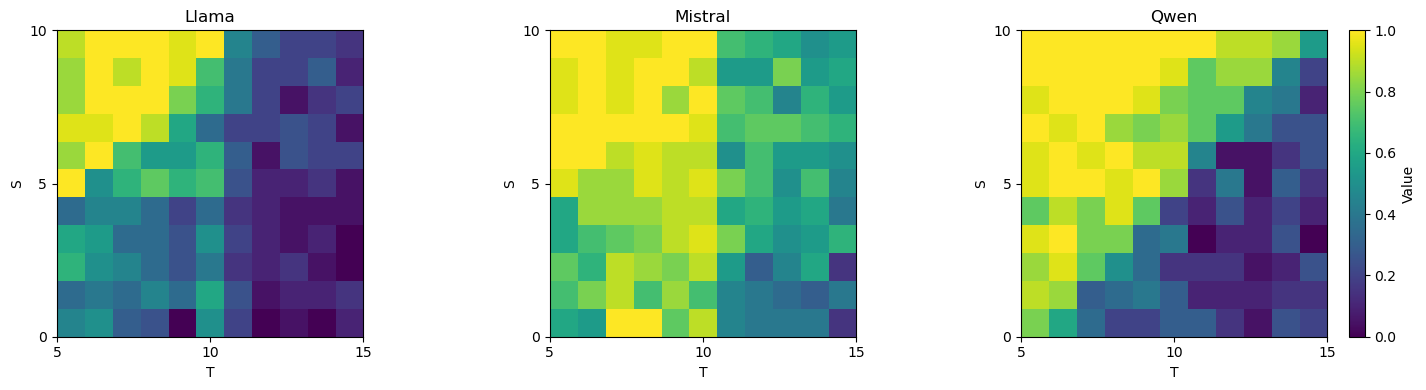

In [61]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))  # 1 fila, 3 columnes

# Primer plot - Llama
im0 = axes[0].imshow(matrices_llm['llama_final'], extent=[5, 15, 0, 10], aspect='equal', vmin=0, vmax=1)
axes[0].set_xlabel("T")
axes[0].set_ylabel("S")
axes[0].set_title("Llama")
axes[0].set_xticks([5, 10, 15])
axes[0].set_yticks([0, 5, 10])

# Segon plot - Mistral
im1 = axes[1].imshow(matrices_llm['mistral_final'], extent=[5, 15, 0, 10], aspect='equal', vmin=0, vmax=1)
axes[1].set_xlabel("T")
axes[1].set_ylabel("S")
axes[1].set_title("Mistral")
axes[1].set_xticks([5, 10, 15])
axes[1].set_yticks([0, 5, 10])

# Tercer plot - Qwen
im2 = axes[2].imshow(matrices_llm['qwen_final'], extent=[5, 15, 0, 10], aspect='equal', vmin=0, vmax=1)
axes[2].set_xlabel("T")
axes[2].set_ylabel("S")
axes[2].set_title("Qwen")
axes[2].set_xticks([5, 10, 15])
axes[2].set_yticks([0, 5, 10])
fig.colorbar(im2, ax=axes[2], label="Value")

plt.tight_layout()
plt.show()

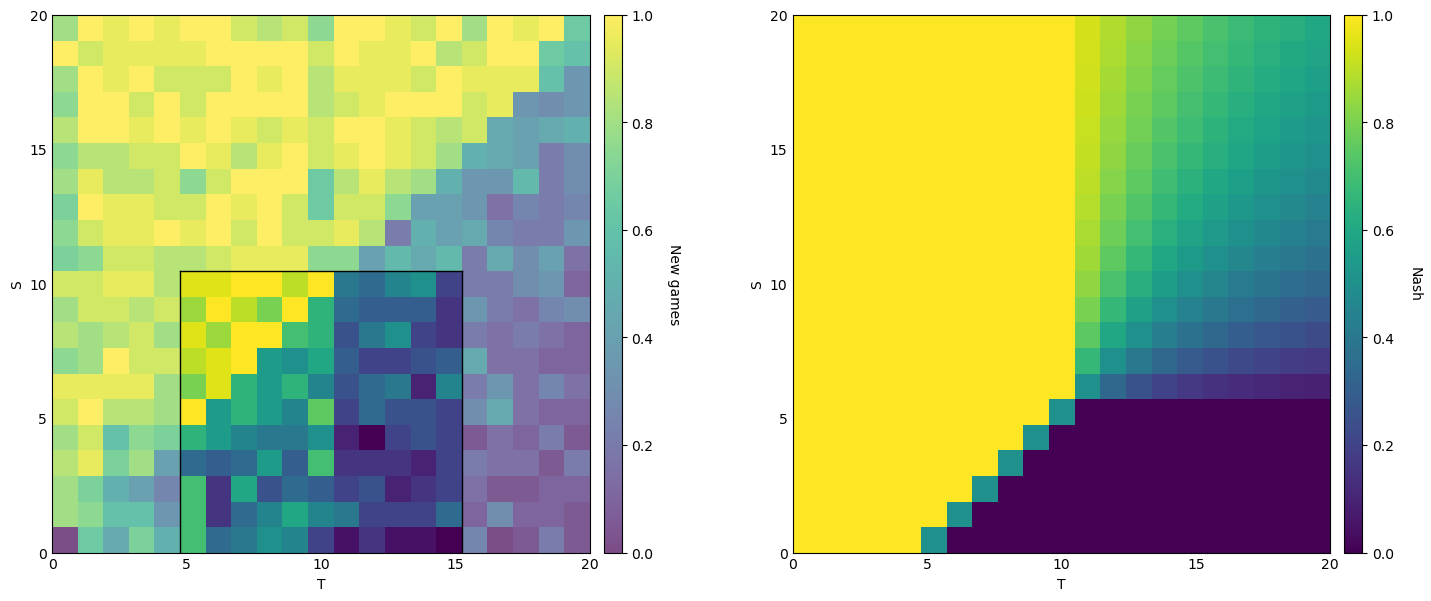

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Carregar la matriu newnash
newnash = np.loadtxt(f'data/newnash.txt')

# Crear figura amb dos subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# ============ SUBPLOT ESQUERRA ============
# Matriu de bloquejos
mask = np.zeros_like(cooperation, dtype=bool)
mask[0:21, 0:5] = True   
mask[0:21, 16:21] = True 
mask[0:10, 5:16] = True 

# Crear alpha channel
alpha = np.ones_like(cooperation, dtype=float)
alpha[mask] = 0.7   # transparència 70% per la zona marcada

# Convertir la màscara en alpha
data_old = np.ma.masked_where(mask, cooperation)  # Non-transparent part
data_new = np.ma.masked_where(~mask, cooperation)  # Transparent part

# Plot the non-transparent part (background layer)
axes[0].imshow(
    data_old,
    extent=[0, 20, 0, 20],
    aspect='equal',
    cmap='viridis',
    alpha=1,  
)

# Plot the transparent part (foreground layer)
im1 = axes[0].imshow(
    data_new,
    extent=[0, 20, 0, 20],
    aspect='equal',
    cmap='viridis',
    alpha=0.7,
    rasterized=False,
)

# Línies negres
axes[0].plot([5*20/21, 5*20/21], [0, 11*20/21], color='black', linewidth=1)
axes[0].plot([5*20/21, 16*20/21], [11*20/21, 11*20/21], color='black', linewidth=1)
axes[0].plot([16*20/21, 16*20/21], [11*20/21, 0], color='black', linewidth=1)

axes[0].set_xlabel("T")
axes[0].set_ylabel("S")
axes[0].set_xticks([0, 5, 10, 15, 20])
axes[0].set_yticks([0, 5, 10, 15, 20])
axes[0].tick_params(axis='x', length=0)
axes[0].tick_params(axis='y', length=0)

# Colorbar només per la part transparent
cbar1 = fig.colorbar(im1, ax=axes[0], pad=0.02, aspect=30)
cbar1.set_label('New games', rotation=270, labelpad=20)

# ============ SUBPLOT DRETA ============
im2 = axes[1].imshow(
    newnash,
    extent=[0, 20, 0, 20],
    aspect='equal',
    cmap='viridis',
)

axes[1].set_xlabel("T")
axes[1].set_ylabel("S")
axes[1].set_xticks([0, 5, 10, 15, 20])
axes[1].set_yticks([0, 5, 10, 15, 20])
axes[1].tick_params(axis='x', length=0)
axes[1].tick_params(axis='y', length=0)

# Colorbar
cbar2 = fig.colorbar(im2, ax=axes[1], pad=0.02, aspect=30)
cbar2.set_label('Nash', rotation=270, labelpad=20)

plt.tight_layout()
plt.show()



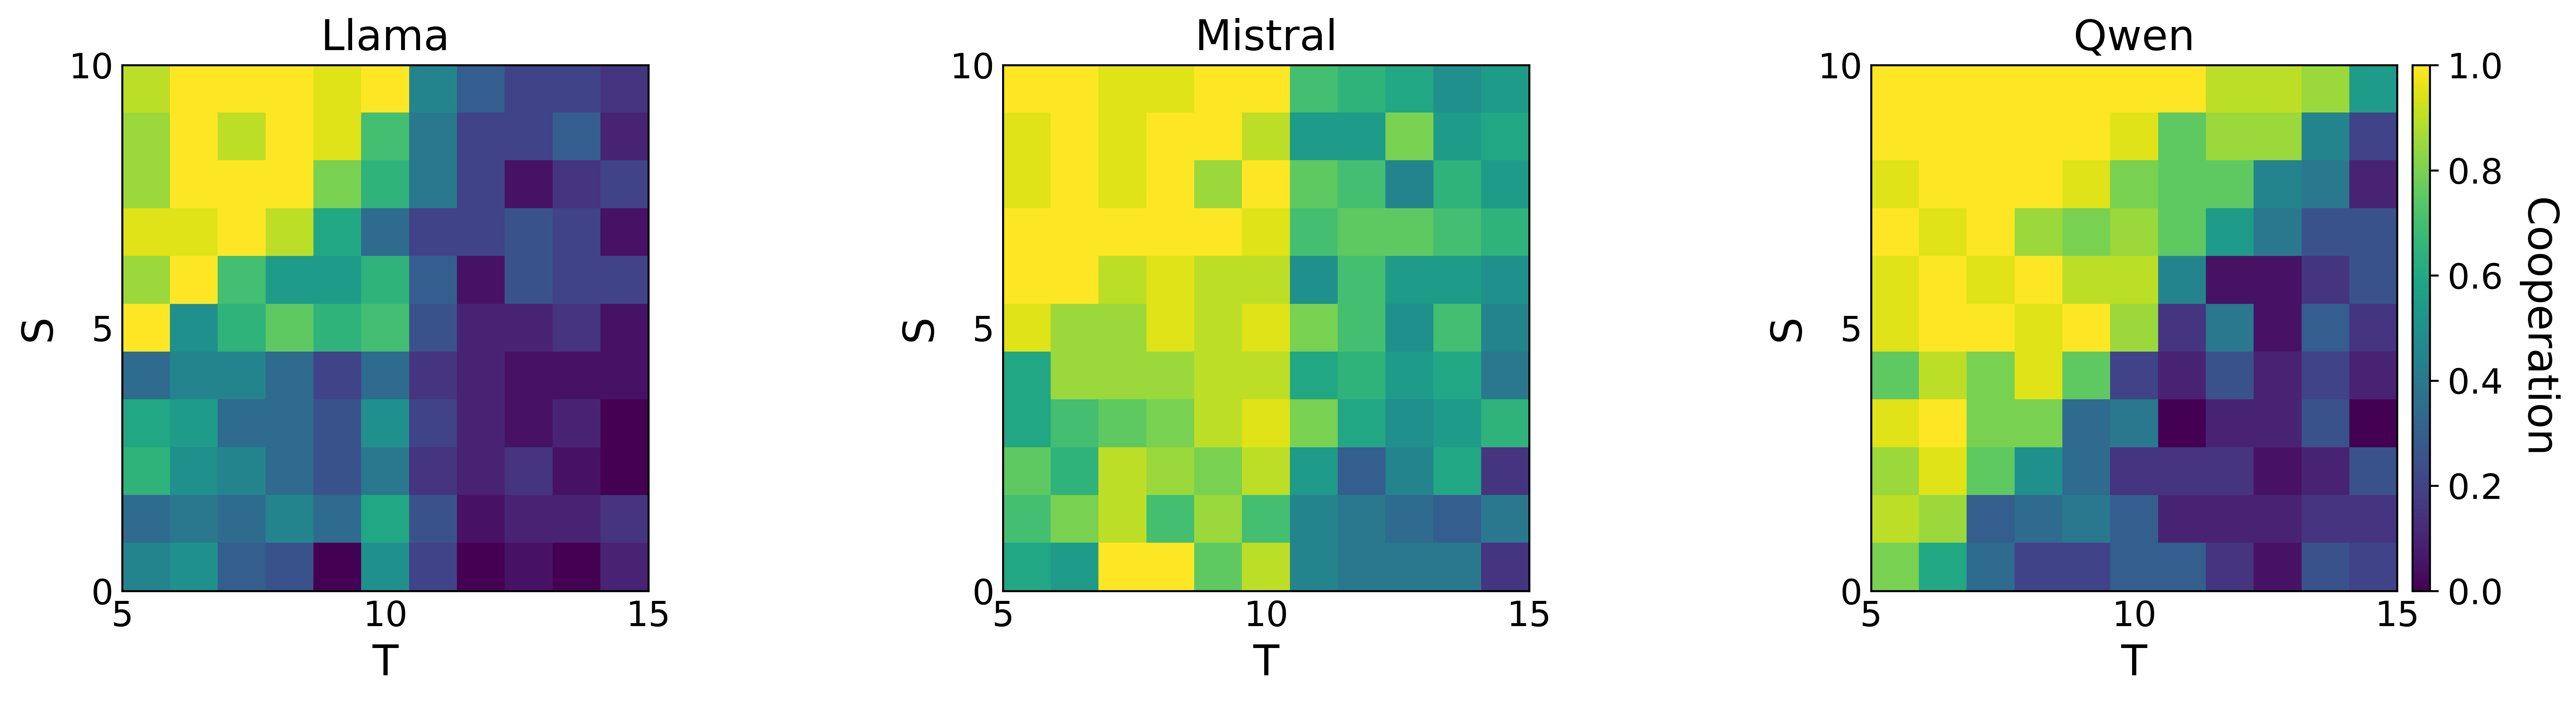

In [49]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 4), dpi=600)

# Primer plot - Llama
im0 = axes[0].imshow(matrices_llm['llama_final'], extent=[5, 15, 0, 10], 
                     aspect='equal', vmin=0, vmax=1, interpolation='nearest')
axes[0].set_xlabel("T", fontsize=17)
axes[0].set_ylabel("S", fontsize=17)
axes[0].set_title("Llama", fontsize=17)
axes[0].set_xticks([5, 10, 15])
axes[0].set_yticks([0, 5, 10])
axes[0].tick_params(axis='x', length=0, labelsize=14)
axes[0].tick_params(axis='y', length=0, labelsize=14)

# Segon plot - Mistral
im1 = axes[1].imshow(matrices_llm['mistral_final'], extent=[5, 15, 0, 10], 
                     aspect='equal', vmin=0, vmax=1, interpolation='nearest')
axes[1].set_xlabel("T", fontsize=17)
axes[1].set_ylabel("S", fontsize=17)
axes[1].set_title("Mistral", fontsize=17)
axes[1].set_xticks([5, 10, 15])
axes[1].set_yticks([0, 5, 10])
axes[1].tick_params(axis='x', length=0, labelsize=14)
axes[1].tick_params(axis='y', length=0, labelsize=14)

# Tercer plot - Qwen
im2 = axes[2].imshow(matrices_llm['qwen_final'], extent=[5, 15, 0, 10], 
                     aspect='equal', vmin=0, vmax=1, interpolation='nearest')
axes[2].set_xlabel("T", fontsize=17)
axes[2].set_ylabel("S", fontsize=17)
axes[2].set_title("Qwen", fontsize=17)
axes[2].set_xticks([5, 10, 15])
axes[2].set_yticks([0, 5, 10])
axes[2].tick_params(axis='x', length=0, labelsize=14)
axes[2].tick_params(axis='y', length=0, labelsize=14)

# Colorbar
cbar = fig.colorbar(im2, ax=axes[2], pad=0.02, aspect=30)
cbar.set_label("Cooperation", rotation=270, labelpad=22, fontsize=17)
cbar.ax.tick_params(labelsize=14)

plt.tight_layout()
plt.show()

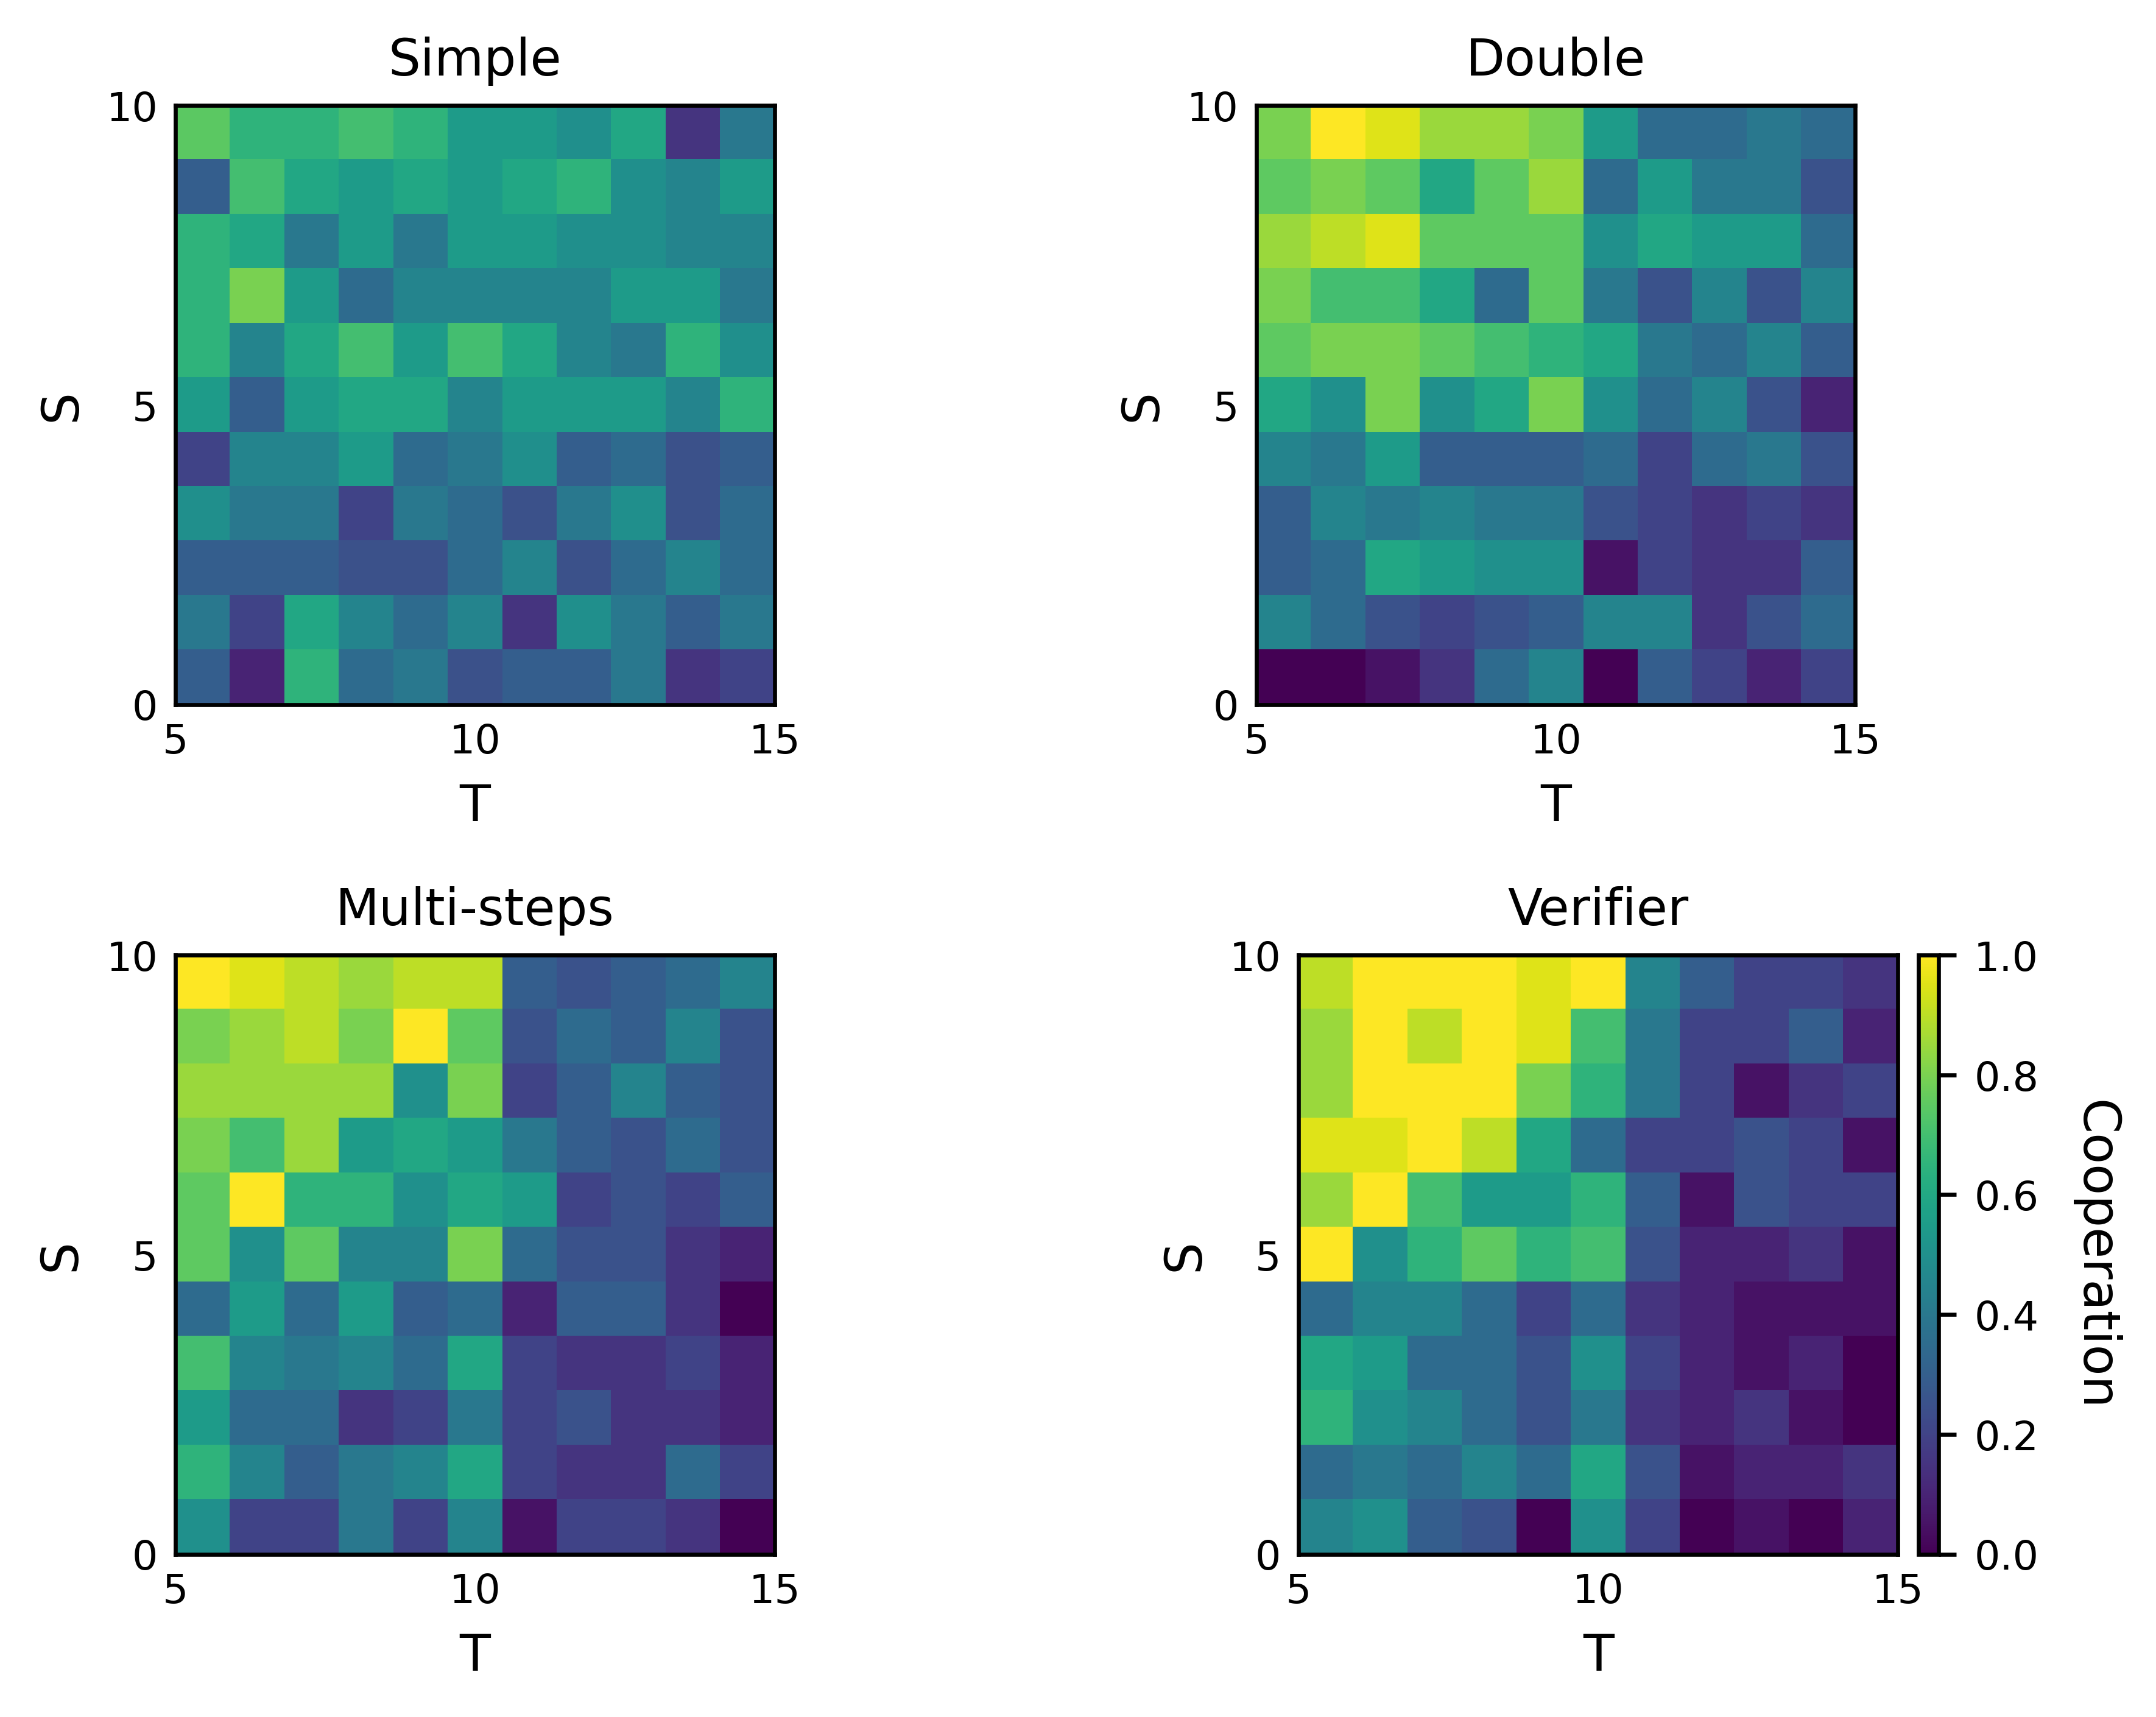

In [47]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, dpi=600)
axes = axes.flatten()

for ax in axes:
    ax.set_xticks([5, 10, 15])
    ax.set_yticks([10, 5, 0])
    ax.tick_params(axis='x', length=0, labelsize=8)
    ax.tick_params(axis='y', length=0, labelsize=8)

# Primer plot
im0 = axes[0].imshow(matrices_llm['llama_simple'], extent=[5, 15, 0, 10], 
                     aspect='equal', vmin=0, vmax=1, interpolation='nearest')
axes[0].set_xlabel("T", fontsize=10)
axes[0].set_ylabel("S", fontsize=10)
axes[0].set_title('Simple', fontsize=10)

# Segon plot
im1 = axes[1].imshow(matrices_llm['llama_extract'], extent=[5, 15, 0, 10], 
                     aspect='equal', vmin=0, vmax=1, interpolation='nearest')
axes[1].set_xlabel("T", fontsize=10)
axes[1].set_ylabel("S", fontsize=10)
axes[1].set_title('Double', fontsize=10)

# Tercer plot
im2 = axes[2].imshow(matrices_llm['llama_multi'], extent=[5, 15, 0, 10], 
                     aspect='equal', vmin=0, vmax=1, interpolation='nearest')
axes[2].set_xlabel("T", fontsize=10)
axes[2].set_ylabel("S", fontsize=10)
axes[2].set_title('Multi-steps', fontsize=10)

# Quart plot
im3 = axes[3].imshow(matrices_llm['llama_final'], extent=[5, 15, 0, 10], 
                     aspect='equal', vmin=0, vmax=1, interpolation='nearest')
axes[3].set_xlabel("T", fontsize=10)
axes[3].set_ylabel("S", fontsize=10)
axes[3].set_title('Verifier', fontsize=10)

# Colorbar at the last plot
cbar = fig.colorbar(im3, ax=axes[3], pad=0.02, aspect=30)
cbar.set_label("Cooperation", rotation=270, labelpad=16, fontsize=10)
cbar.ax.tick_params(labelsize=8)

plt.tight_layout()
plt.show()

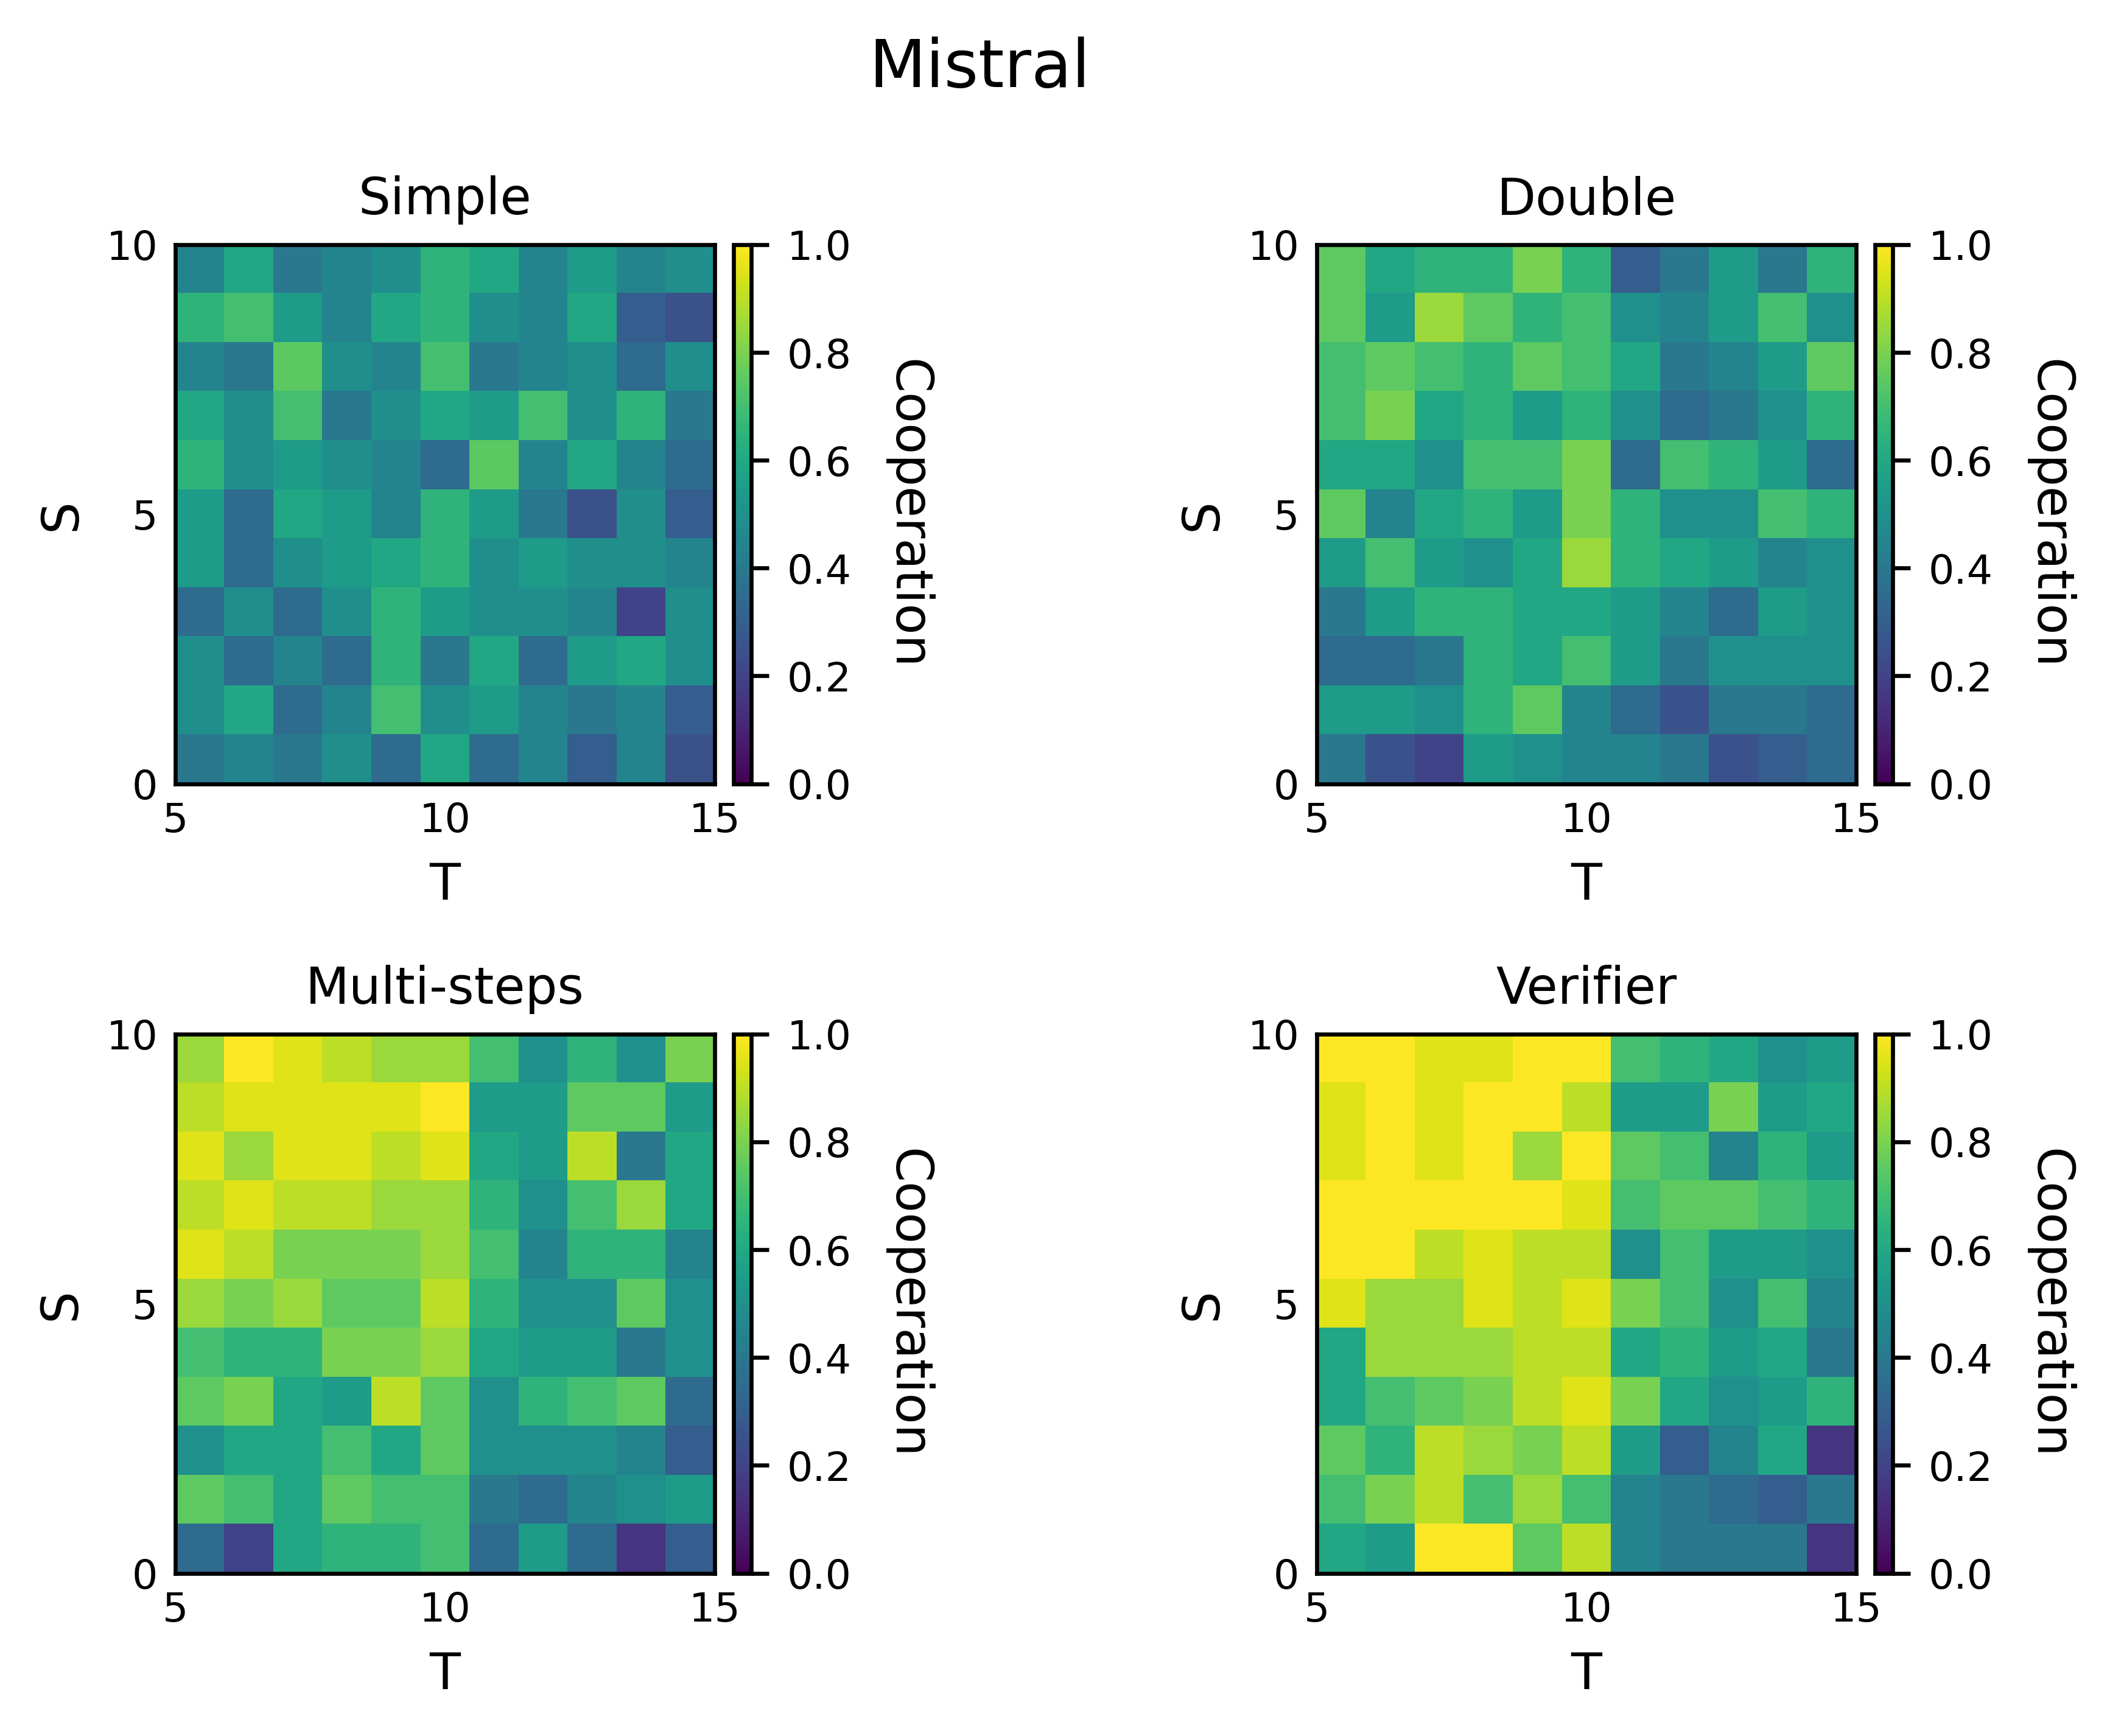

In [53]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, dpi=600)
axes = axes.flatten()

for ax in axes:
    ax.set_xticks([5, 10, 15])
    ax.set_yticks([10, 5, 0])
    ax.tick_params(axis='x', length=0, labelsize=8)
    ax.tick_params(axis='y', length=0, labelsize=8)

# Primer plot
im0 = axes[0].imshow(matrices_llm['mistral_simple'], extent=[5, 15, 0, 10], 
                     aspect='equal', vmin=0, vmax=1, interpolation='nearest')
axes[0].set_xlabel("T", fontsize=10)
axes[0].set_ylabel("S", fontsize=10)
axes[0].set_title('Simple', fontsize=10)
cbar0 = fig.colorbar(im0, ax=axes[0], pad=0.02, aspect=30)
cbar0.set_label("Cooperation", rotation=270, labelpad=16, fontsize=10)
cbar0.ax.tick_params(labelsize=8)

# Segon plot
im1 = axes[1].imshow(matrices_llm['mistral_extract'], extent=[5, 15, 0, 10], 
                     aspect='equal', vmin=0, vmax=1, interpolation='nearest')
axes[1].set_xlabel("T", fontsize=10)
axes[1].set_ylabel("S", fontsize=10)
axes[1].set_title('Double', fontsize=10)
cbar1 = fig.colorbar(im1, ax=axes[1], pad=0.02, aspect=30)
cbar1.set_label("Cooperation", rotation=270, labelpad=16, fontsize=10)
cbar1.ax.tick_params(labelsize=8)

# Tercer plot
im2 = axes[2].imshow(matrices_llm['mistral_multi'], extent=[5, 15, 0, 10], 
                     aspect='equal', vmin=0, vmax=1, interpolation='nearest')
axes[2].set_xlabel("T", fontsize=10)
axes[2].set_ylabel("S", fontsize=10)
axes[2].set_title('Multi-steps', fontsize=10)
cbar2 = fig.colorbar(im2, ax=axes[2], pad=0.02, aspect=30)
cbar2.set_label("Cooperation", rotation=270, labelpad=16, fontsize=10)
cbar2.ax.tick_params(labelsize=8)

# Quart plot
im3 = axes[3].imshow(matrices_llm['mistral_final'], extent=[5, 15, 0, 10], 
                     aspect='equal', vmin=0, vmax=1, interpolation='nearest')
axes[3].set_xlabel("T", fontsize=10)
axes[3].set_ylabel("S", fontsize=10)
axes[3].set_title('Verifier', fontsize=10)
cbar3 = fig.colorbar(im3, ax=axes[3], pad=0.02, aspect=30)
cbar3.set_label("Cooperation", rotation=270, labelpad=16, fontsize=10)
cbar3.ax.tick_params(labelsize=8)

# Overall title
fig.suptitle('Mistral', fontsize=13, y=0.98)

plt.tight_layout()
plt.show()

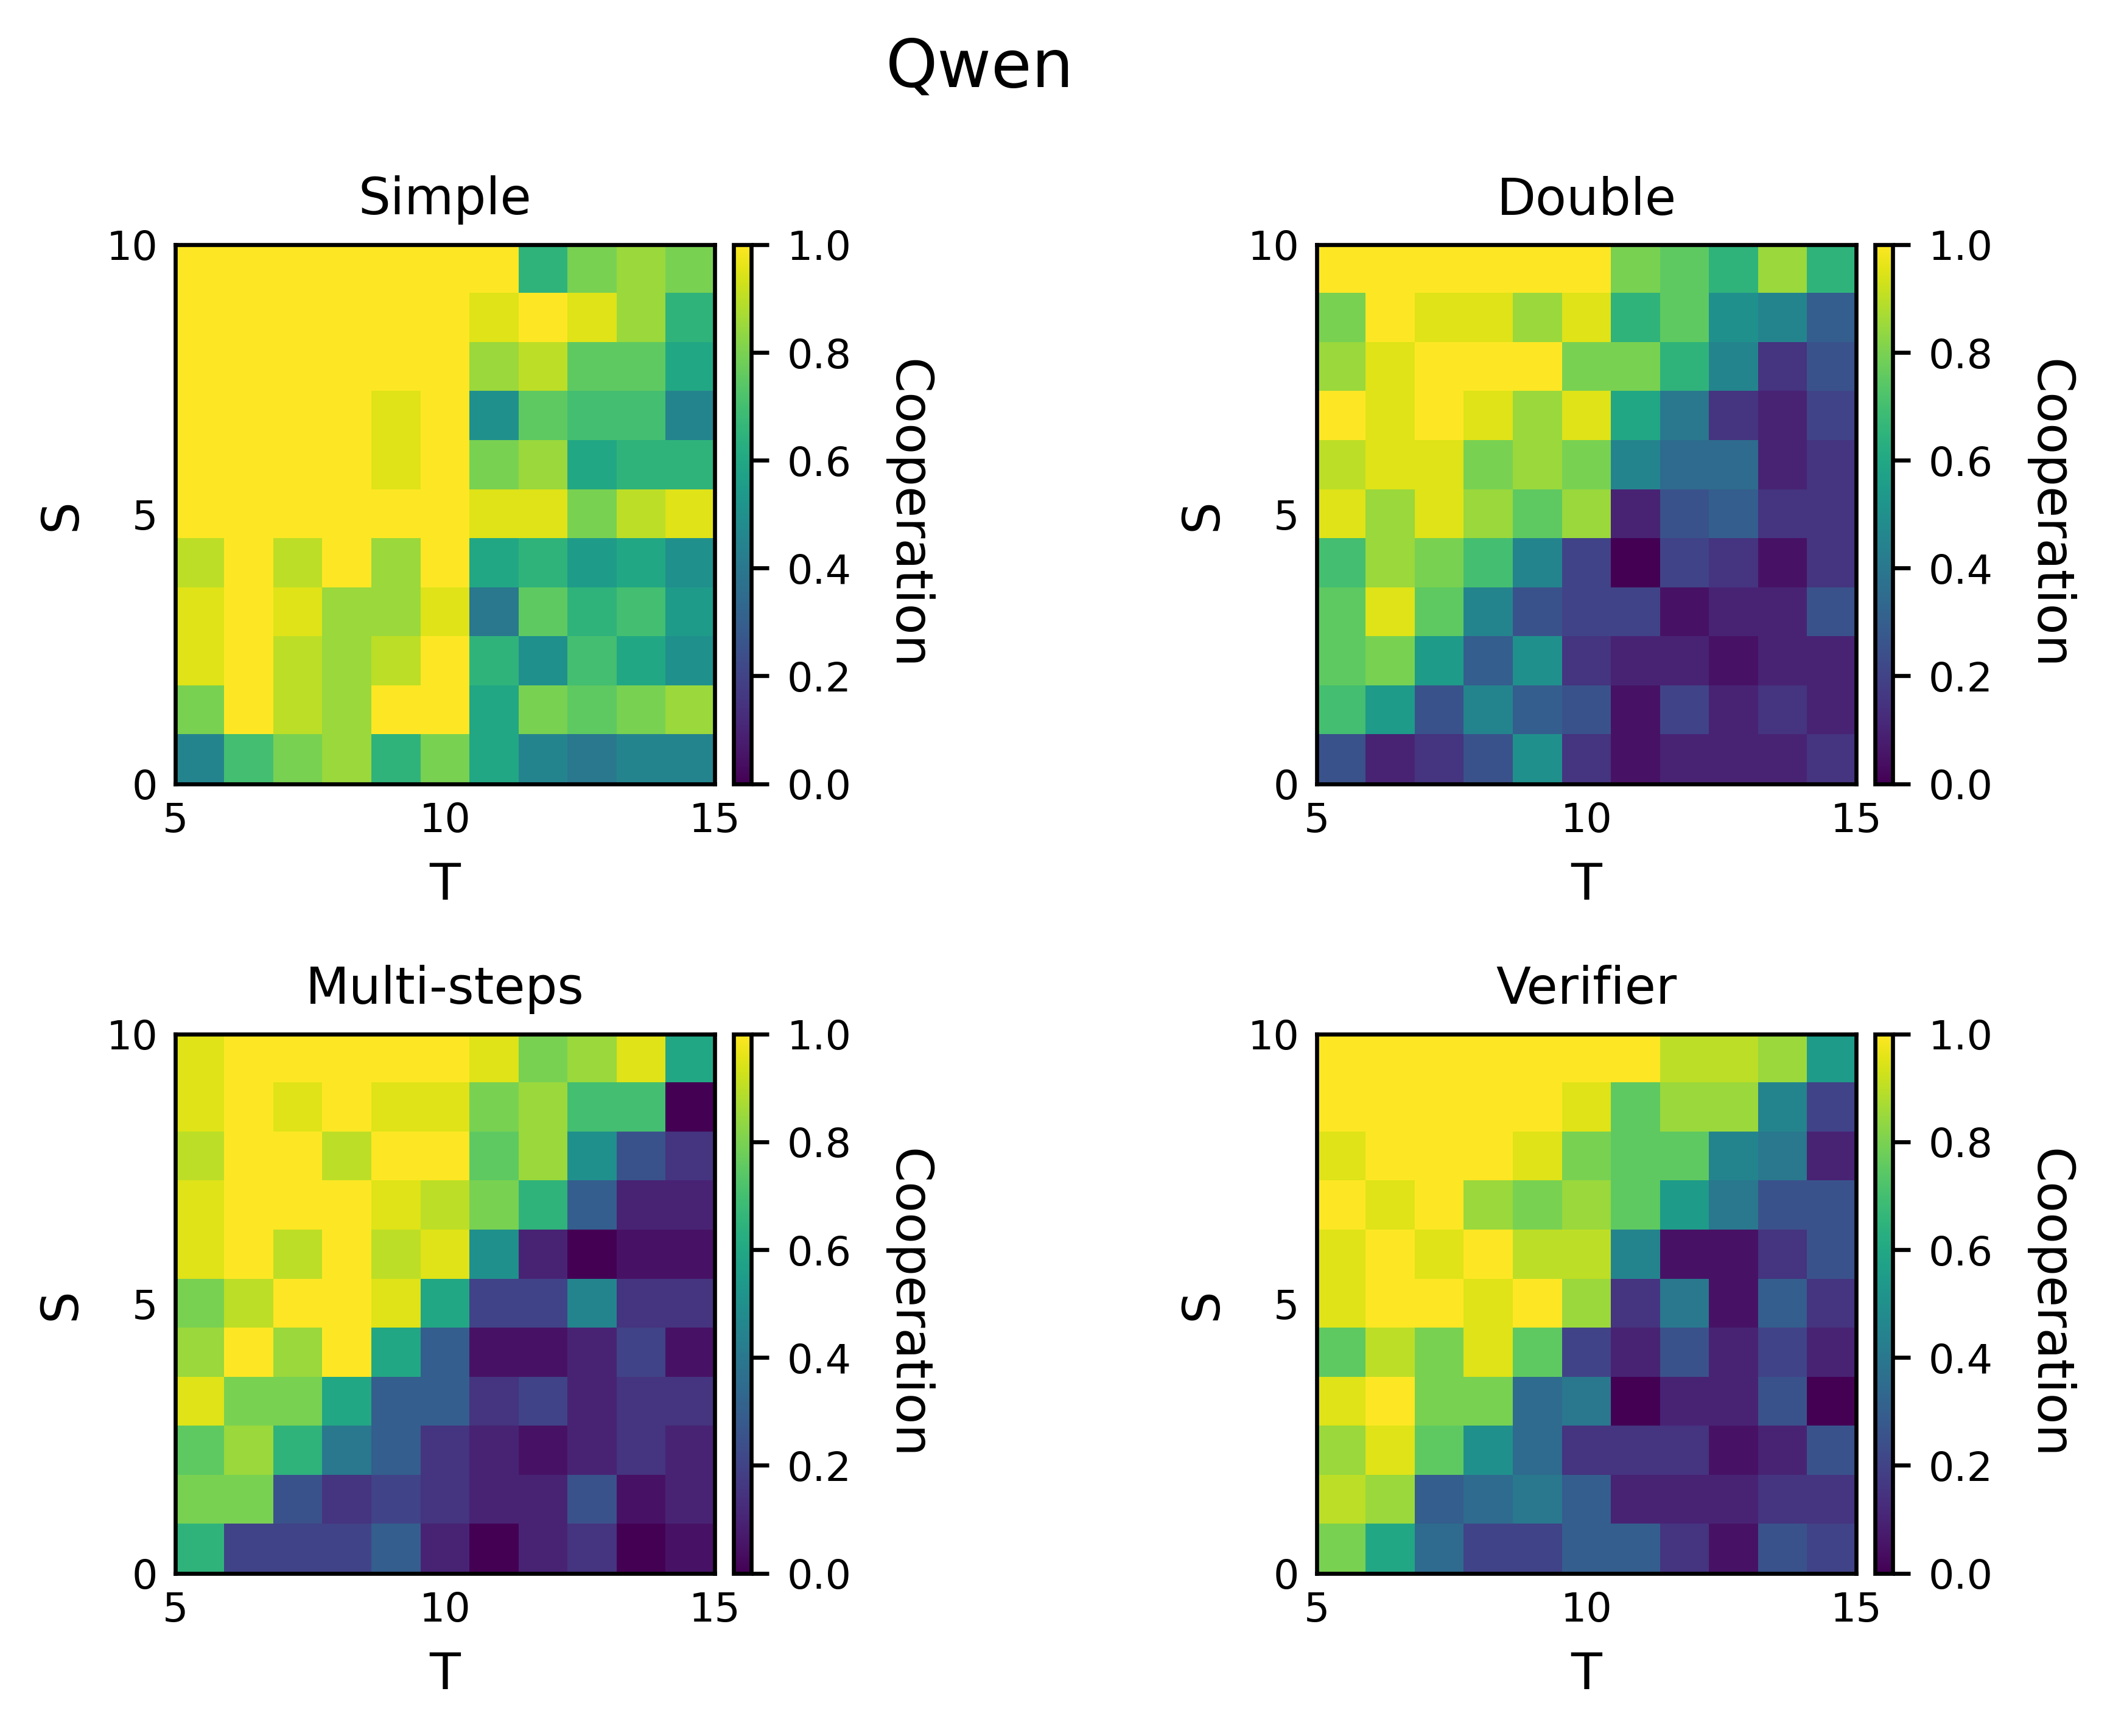

In [55]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, dpi=600)
axes = axes.flatten()

for ax in axes:
    ax.set_xticks([5, 10, 15])
    ax.set_yticks([10, 5, 0])
    ax.tick_params(axis='x', length=0, labelsize=8)
    ax.tick_params(axis='y', length=0, labelsize=8)

# Primer plot
im0 = axes[0].imshow(matrices_llm['qwen_simple'], extent=[5, 15, 0, 10], 
                     aspect='equal', vmin=0, vmax=1, interpolation='nearest')
axes[0].set_xlabel("T", fontsize=10)
axes[0].set_ylabel("S", fontsize=10)
axes[0].set_title('Simple', fontsize=10)
cbar0 = fig.colorbar(im0, ax=axes[0], pad=0.02, aspect=30)
cbar0.set_label("Cooperation", rotation=270, labelpad=16, fontsize=10)
cbar0.ax.tick_params(labelsize=8)

# Segon plot
im1 = axes[1].imshow(matrices_llm['qwen_extract'], extent=[5, 15, 0, 10], 
                     aspect='equal', vmin=0, vmax=1, interpolation='nearest')
axes[1].set_xlabel("T", fontsize=10)
axes[1].set_ylabel("S", fontsize=10)
axes[1].set_title('Double', fontsize=10)
cbar1 = fig.colorbar(im1, ax=axes[1], pad=0.02, aspect=30)
cbar1.set_label("Cooperation", rotation=270, labelpad=16, fontsize=10)
cbar1.ax.tick_params(labelsize=8)

# Tercer plot
im2 = axes[2].imshow(matrices_llm['qwen_multi'], extent=[5, 15, 0, 10], 
                     aspect='equal', vmin=0, vmax=1, interpolation='nearest')
axes[2].set_xlabel("T", fontsize=10)
axes[2].set_ylabel("S", fontsize=10)
axes[2].set_title('Multi-steps', fontsize=10)
cbar2 = fig.colorbar(im2, ax=axes[2], pad=0.02, aspect=30)
cbar2.set_label("Cooperation", rotation=270, labelpad=16, fontsize=10)
cbar2.ax.tick_params(labelsize=8)

# Quart plot
im3 = axes[3].imshow(matrices_llm['qwen_final'], extent=[5, 15, 0, 10], 
                     aspect='equal', vmin=0, vmax=1, interpolation='nearest')
axes[3].set_xlabel("T", fontsize=10)
axes[3].set_ylabel("S", fontsize=10)
axes[3].set_title('Verifier', fontsize=10)
cbar3 = fig.colorbar(im3, ax=axes[3], pad=0.02, aspect=30)
cbar3.set_label("Cooperation", rotation=270, labelpad=16, fontsize=10)
cbar3.ax.tick_params(labelsize=8)

# Overall title
fig.suptitle('Qwen', fontsize=13, y=0.98)

plt.tight_layout()
plt.show()

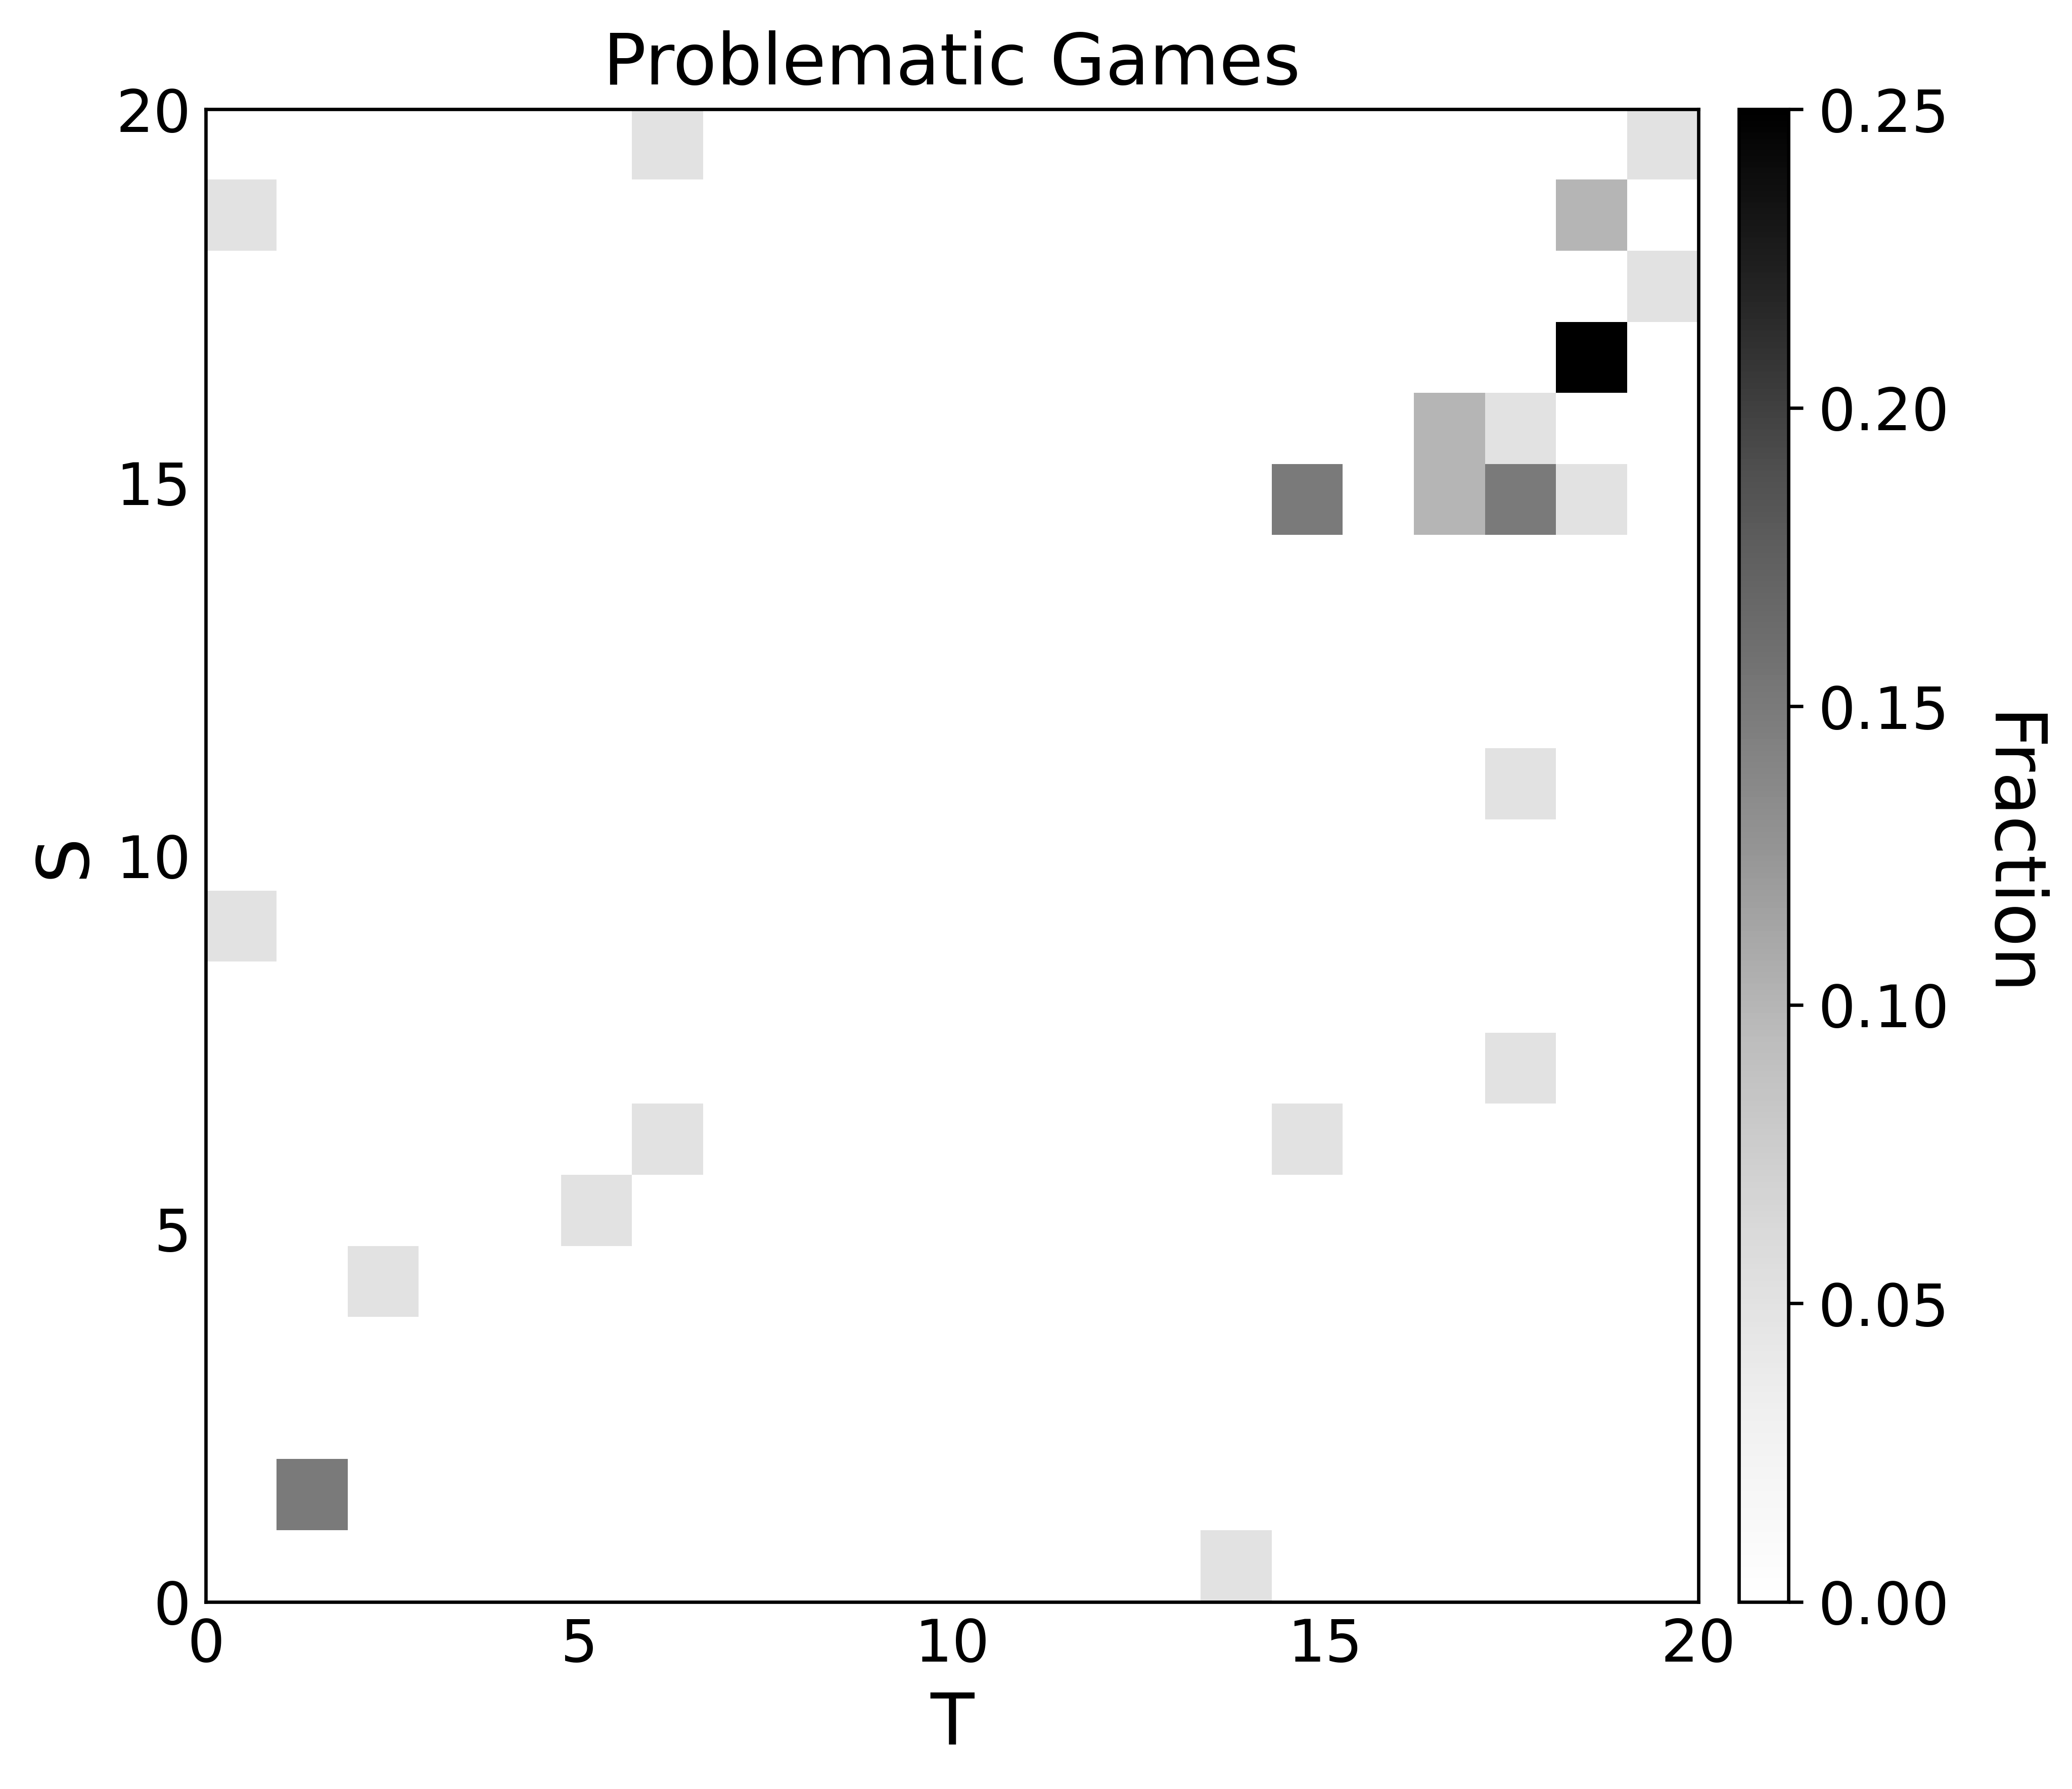

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Crear figura
fig, ax = plt.subplots(1, 1, figsize=(7.5, 6), dpi=600)

# Matriu de bloquejos
im = ax.imshow(
    sticking,
    extent=[0, 20, 0, 20],
    aspect='equal',
    cmap='Greys',
    interpolation='nearest'
)

ax.set_xlabel("T", fontsize=17)
ax.set_ylabel("S", fontsize=17)
ax.set_title("Problematic Games", fontsize=17)
ax.set_xticks([0, 5, 10, 15, 20])
ax.set_yticks([0, 5, 10, 15, 20])
ax.tick_params(axis='x', length=0, labelsize=14)
ax.tick_params(axis='y', length=0, labelsize=14)

# Colorbar
cbar = fig.colorbar(im, ax=ax, pad=0.02, aspect=30)
cbar.set_label("Fraction", rotation=270, labelpad=22, fontsize=17)
cbar.ax.tick_params(labelsize=14)

plt.tight_layout()
plt.show()